<a href="https://colab.research.google.com/github/bellonbits/Deep-Learning-Projects/blob/main/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install quandl


In [9]:
import yfinance as yf

# Define the ticker symbol for Nike
ticker_symbol = "NKE"

# Fetch historical market data for Nike
data = yf.download(ticker_symbol, start="2020-01-01", end="2023-09-01")

# Save the data to a CSV file
data.to_csv("nike_stock_data.csv")

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2020-01-02  101.360001  102.209999  101.019997  102.199997  97.412949  5644100
2020-01-03  100.589996  102.000000  100.309998  101.919998  97.146072  4541800
2020-01-06  100.949997  101.839996  100.870003  101.830002  97.060265  4612400
2020-01-07  101.809998  102.739998  100.809998  101.779999  97.012611  6719900
2020-01-08  101.309998  102.139999  100.849998  101.550003  96.793396  4942200


[*********************100%***********************]  1 of 1 completed


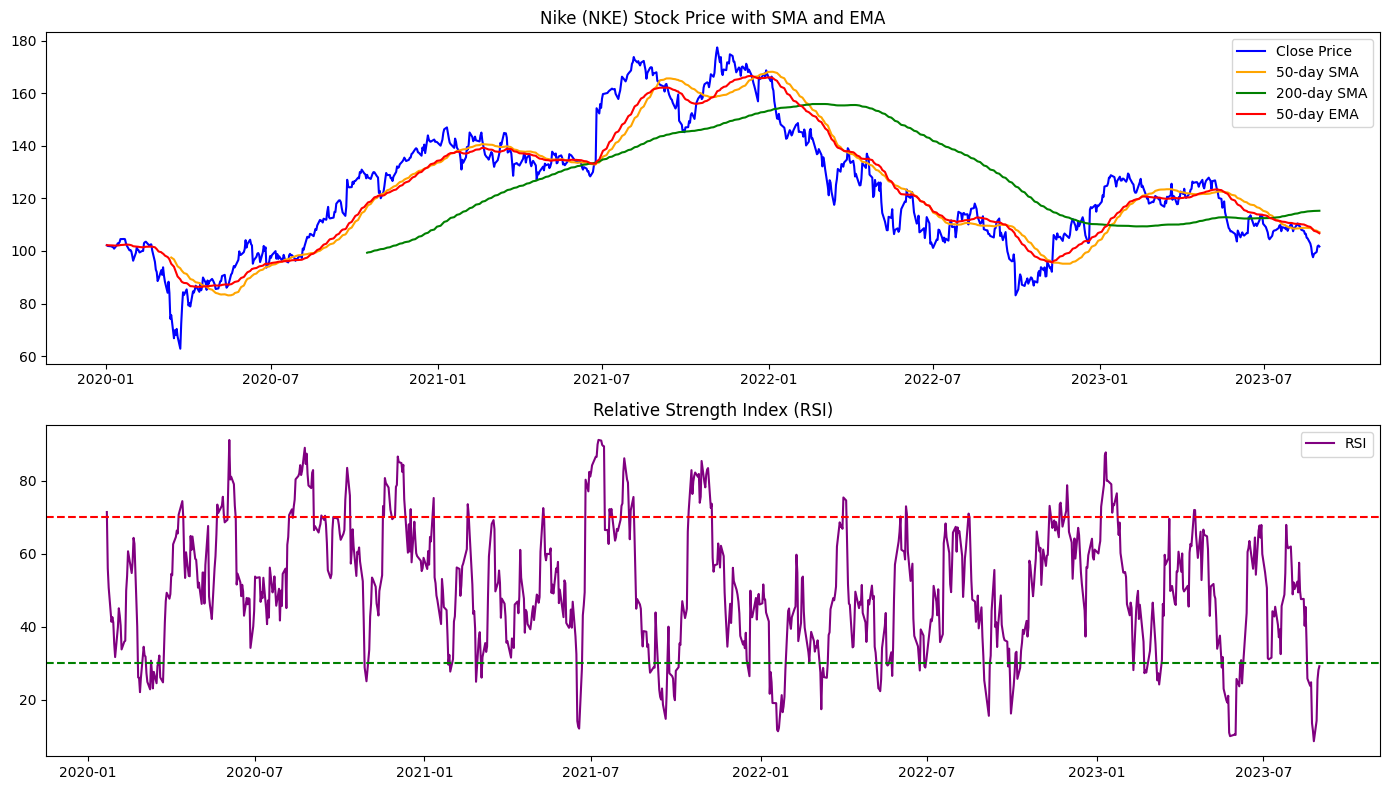

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch historical market data for Nike
ticker_symbol = "NKE"
data = yf.download(ticker_symbol, start="2020-01-01", end="2023-09-01")

# Calculate Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day SMA
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day SMA

# Calculate Exponential Moving Average (EMA)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Plot the Close price along with the SMA and EMA
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-day SMA', color='green')
plt.plot(data['EMA_50'], label='50-day EMA', color='red')
plt.title('Nike (NKE) Stock Price with SMA and EMA')
plt.legend()

# Plot the RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-750729ca9fa7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA_50'][50:] > data['SMA_200'][50:], 1.0, 0.0)


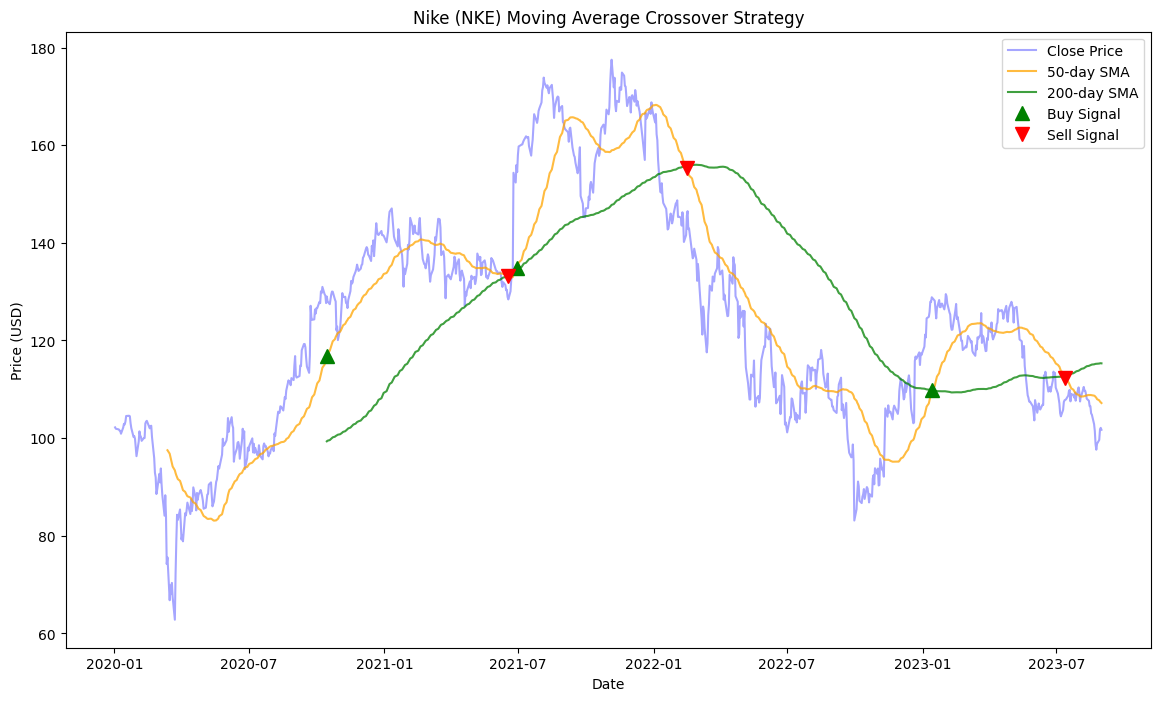

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch historical market data for Nike
ticker_symbol = "NKE"
data = yf.download(ticker_symbol, start="2020-01-01", end="2023-09-01")

# Calculate Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day SMA
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day SMA

# Create a signal column
data['Signal'] = 0.0
data['Signal'][50:] = np.where(data['SMA_50'][50:] > data['SMA_200'][50:], 1.0, 0.0)

# Generate Buy and Sell signals
data['Position'] = data['Signal'].diff()

# Plot the data along with buy/sell signals
plt.figure(figsize=(14, 8))

# Plot the closing price along with SMAs
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(data['SMA_50'], label='50-day SMA', color='orange', alpha=0.75)
plt.plot(data['SMA_200'], label='200-day SMA', color='green', alpha=0.75)

# Mark Buy signals
plt.plot(data[data['Position'] == 1.0].index,
         data['SMA_50'][data['Position'] == 1.0],
         '^', markersize=10, color='green', label='Buy Signal')

# Mark Sell signals
plt.plot(data[data['Position'] == -1.0].index,
         data['SMA_50'][data['Position'] == -1.0],
         'v', markersize=10, color='red', label='Sell Signal')

plt.title('Nike (NKE) Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()